# Fashion-MNIST 데이터 CNN을 통한 이미지 분류

-------------------------------------------------------------------------------------

본 과제에서는 Fashion-MNIST 데이터를 활용하여 CNN 모델을 구축하여 데이터를 학습시켜 모델을 평가하는 과정을 통하여 정확도 확인 및 잘못 분류된 이미지에 대한 분석을 진행한다.

- 1. Fashion-MNIST 데이터셋 로드 및 훈련 데이터, 테스트 데이터로 분할

- 2. 이미지 데이터의 형태 및 클레스 레이블을 시각적 탐색 및 분석 진행

- 3. CNN 모델 구축 (1개의 컨볼루션 레이어, 풀링 레이어 포함)

- 4. 모델 컴파일 및 손실 함수와 최적화 알고리즘 선택 및 구현

- 5. 훈련 데이터를 모델에 학습시키고 학습 과정의 손실과 정확도 모니터링을 통한 확인

- 6. 학습을 완료한 모델에 테스트 데이터를 통해 모델을 평가 후 최종 정확도 보고

- 7. 잘못된 분류 이미지 분석 및 어떤 클래스가 모델에 의해 가장 잘못 분류되었는지 시각화 자료를 통해 확인 진행

총 7단계의 과정을 통해 진행된다.

-------------------------------------------------------------------------------------

# 작업 환경

-------------------------------------------------------------------------------------

- Python Version : 3.10.13


-------------------------------------------------------------------------------------


# 필요한 라이브러리 설치 및 환경 준비

In [44]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py

%pip install torchvision # torchvision 라이브러리 설치
%pip install torchinfo # torchinfo 라이브러리 설치
%pip install pytorchcv # pytorchcv 라이브러리 설치
%pip install torchsummary # 신경망 모델의 요약 정보를 보여주는 라이브러리 설치

# 데이터셋 읽어오는 모듈
import numpy as np #numpy (배열 처리)

# CNN 구성
import torch #pytorch import 진행
import torch.nn as nn #신경망을 위한 nn 정의
import torchvision #torchvision
import pytorchcv #pytorchcv import
import torch.optim as optim #최적화 구현 패키지
import torch.nn.functional as F
import pylab
import matplotlib.pyplot as plt #시각화를 위한 pyplot
from torchinfo import summary #모델의 구조를 확인 위한 torchinfo

from pytorchcv import load_Fasion_mnist, train, plot_results, plot_convolution, display_dataset, validate

--2024-04-24 16:53:58--  https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/computer-vision-pytorch/pytorchcv.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6540 (6.4K) [text/plain]
Saving to: ‘pytorchcv.py.1’

pytorchcv.py.1      100%[===================>]   6.39K  --.-KB/s    in 0s      

2024-04-24 16:53:58 (18.4 MB/s) - ‘pytorchcv.py.1’ saved [6540/6540]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1. Fashion-MNIST 데이터셋 로드 및 훈련 데이터, 테스트 데이터로 분할

하단의 코드에서는 pytorchcv.py에 정의된 load_Fasion_mnist() 함수를 통해 train_data와 test_data로 나누어 분할을 진행하고 데이터의 타입을 확인한다

In [45]:
# 미리 정의해둔 load_Fasion_minst를 batch_size를 64로 지정하여 train_data와 test_data로 분할 진행
train_data = load_Fasion_mnist(batch_size=64)
test_data = load_Fasion_mnist(batch_size=64)

# data 형식 확인 (FashionMNIST로 정상적인 데이터를 읽어온 사실을 확인 가능함)
print(type(data_train))
print(type(data_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
<class 'torchvision.datasets.mnist.FashionMNIST'>


# 2. 이미지 데이터의 형태 및 클레스 레이블을 시각적 탐색 및 분석 진행 (training data에 대한 추가)

위의 load_Fasion_mnist 함수에서 존재하는 data_train의 내용을 레이블의 형식에 따라 어떤 데이터가 있는지를 cmap을 통해서 시각화를 통해서 확인하고 각 레이블에 해당하는 데이터가 각각 몇개씩 존재하는지를 막대 plot을 통해서 확인하는 과정을 진행한다

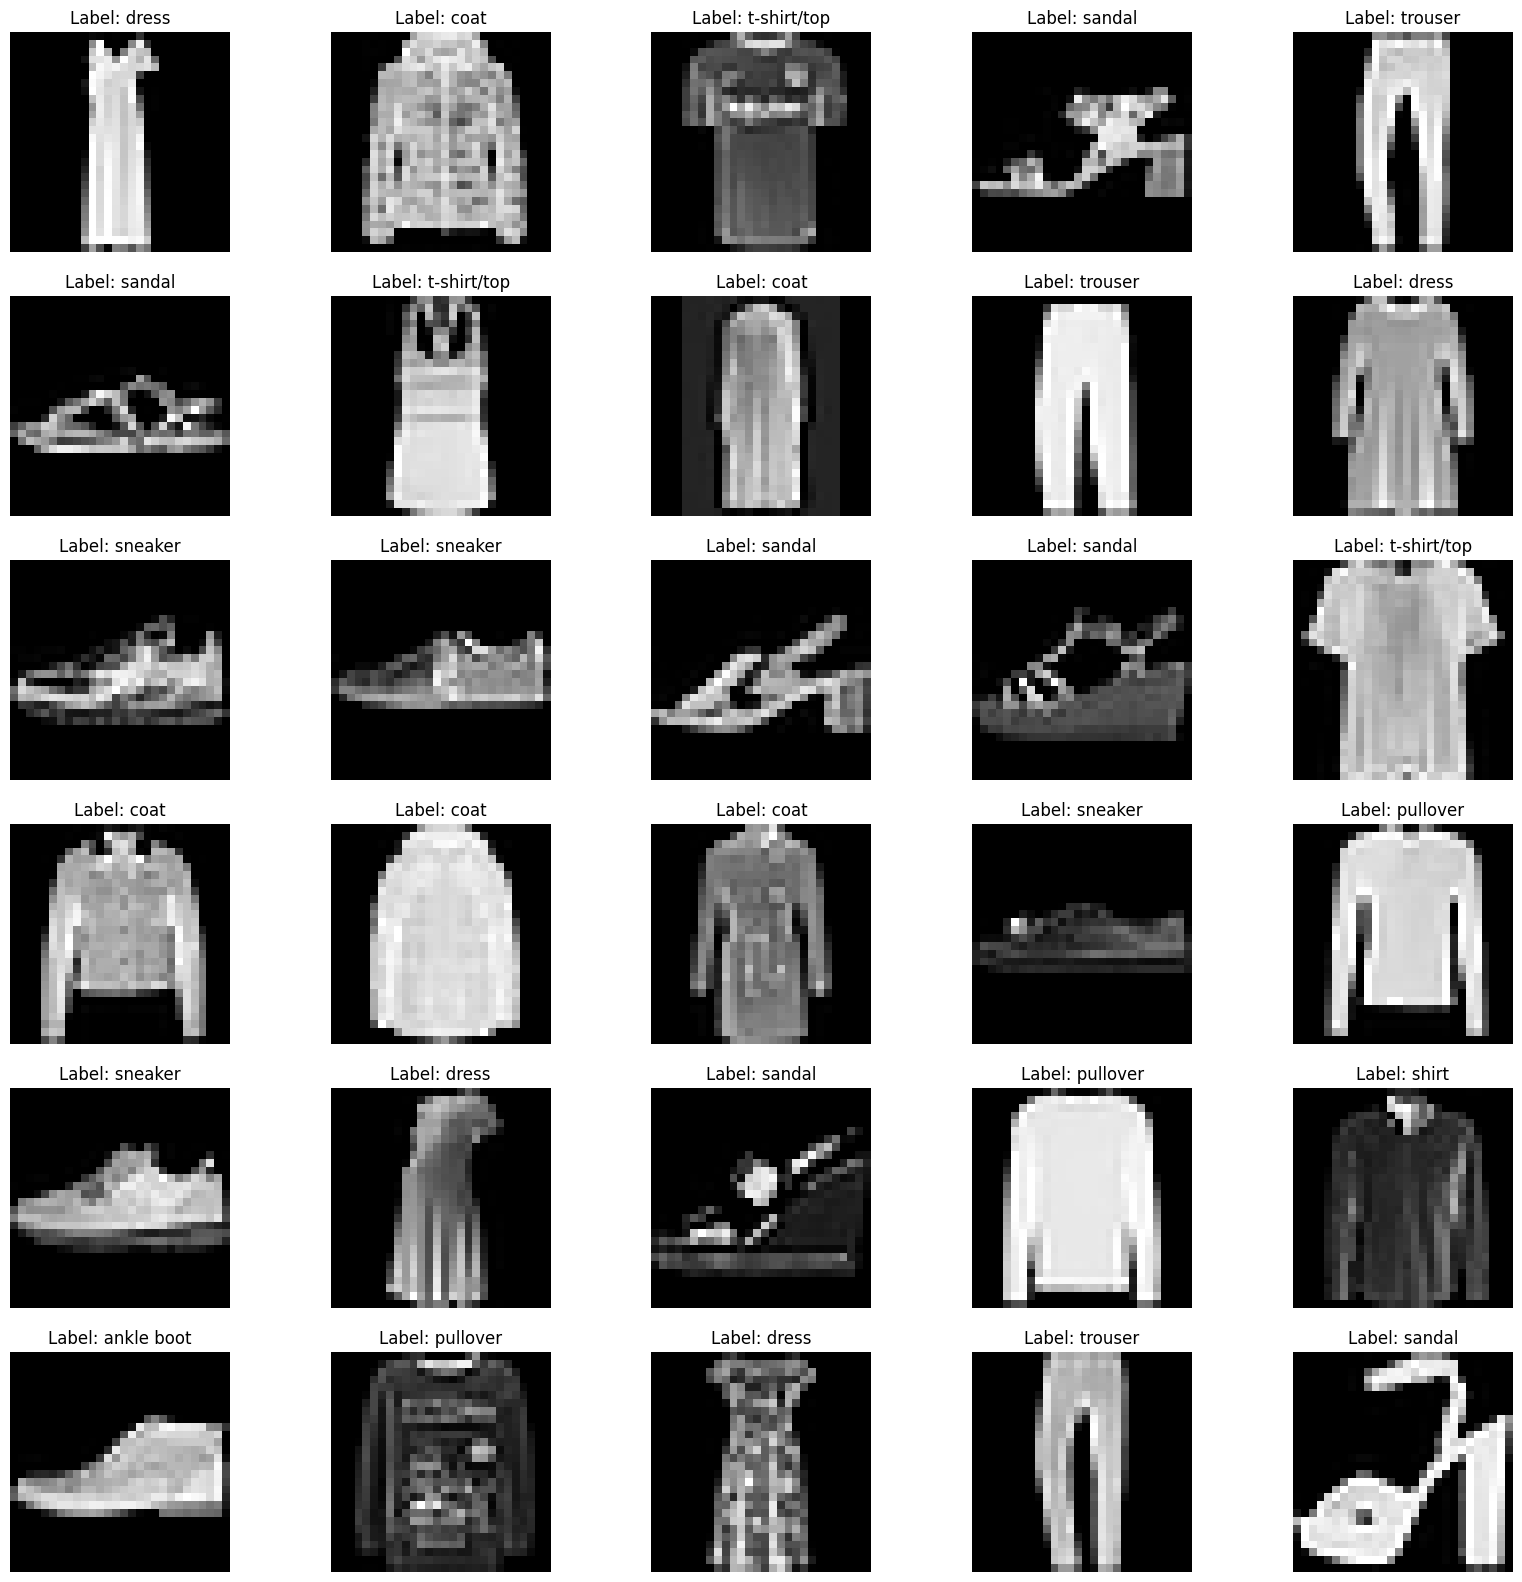

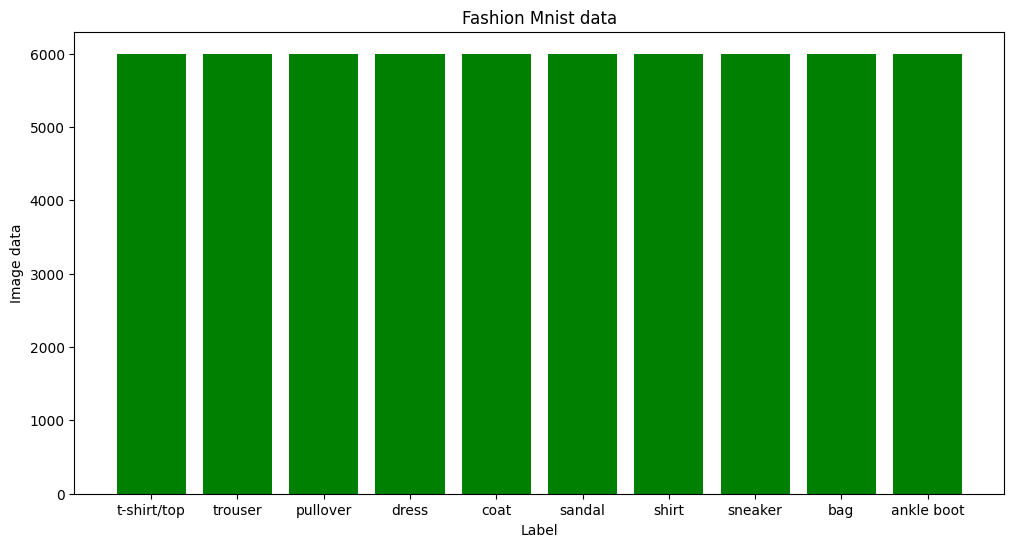

{9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}


In [46]:
# 이미지 데이터에 저장되어 있는 종류를 출력하기 전에 레이블을 공식 데이터에 따라 정의
labels_map = { 0: "t-shirt/top", 1: "trouser", 2: "pullover", 3: "dress", 4: "coat", 5: "sandal", 6: "shirt", 7: "sneaker", 8: "bag", 9: "ankle boot"}

# 1). cmap을 통해 이미지 데이터 중 랜덤으로 뽑아 종류에 대한 확인
# 하단의 cmap을 통해서 확인하면 데이터는 gray 이미지로 구성되어 있음을 확인 가능하다. 

figure = plt.figure(figsize=(20, 20)) #사이즈를 20, 20으로 지정
cols, rows = 5, 6 #5행 6열 구성으로 총 30개의 샘플 데이터가 출력될 것임.

for i in range(1, cols * rows + 1): # 위에서 지정한 배열에 맞게 30개의 샘플 데이터를 출력함
    sample_idx = torch.randint(len(data_train), size=(1,)).item() #torch의 randint를 이용해 랜덤한 인덱스 하나를 선택함
    img, label = data_train[sample_idx] #data_train에 sample_idx에 해당하는 이미지와 레이블을 가져옴
    
    figure.add_subplot(rows, cols, i) # 순서대로 이미지와 레이블을 추가함
    plt.title(f"Label: {labels_map[label]}") # 레이블 명을 이미지 위에 추가 (위에서 정의한 레이블 명을 해당하는 것을 찾아서 추가)
    plt.axis("off") # 세부적인 눈금이나 필요없는 것들은 지워버림
    plt.imshow(img.squeeze(), cmap="gray") # 이미지를 보여주며, gray 이미지로 표시함.

plt.show() # 이미지 보기

# 2). data_train을 lable의 종류에 따라 데이터양을 확인해보기
# data_train 내부에 image와 label이 함께 있기 때문에 반복문을 통해 image와 lable을 검사하며 0부터 시작하여 9까지의 레이블에 해당하는 이미지를 찾을 경우 count를 진행하여 하단의 label_counts에 저장을 진행함
# 1. label_count 진행
# 2. label_count를 sort를 진행하여 0 ~ 9까지 순서대로 정렬
# 3. labels에 기존에 정의해둔 레이블 명칭을 더하여 리스트화 시킴
# 4. counts에는 label_count에 저장해둔 이미지 데이터의 수를 리스트화 시킴
# 5. plt를 통해 막대 그래프로 데이터의 갯수를 시각화하여 출력함

label_counts = {}  # 0 ~ 9
# data_train에서 이미지와 레이블을 순회하며 이미지 데이터의 양을 count하여 label_counts에 저장함
for image, label in data_train: #image와 label를 각 data_train의 모든 데이터를 돌며 뽑아냄
    if label in label_counts: # label이 label_count에 저장된 값이 해당될 경우
        label_counts[label] += 1  # 이미지 갯수 +1
    else:  # 이미지 데이터에 해당하는 레이블이 label_counts에 없으면
        label_counts[label] = 1  # 해당하는 이미지 레이블 값의 키를 새로 만들어서 추가함

# 레이블별 이미지 데이터 수를 key로 두고 정렬을 진행하여 딕셔너리로 만들어 sorted_label_counts에 저장함
sorted_label_counts = dict(sorted(label_counts.items()))

# 정렬된 상태의 딕셔너리의 키값과 value를 뽑아서 시각화를 위해 따로 빼서 저장을 진행함
labels = [labels_map[label] for label in sorted_label_counts.keys()]  # 레이블의 이름은 위에서 정의해둔 labels_map에서 해당하는 값을 가져와 바꿔서 저장함
counts = list(sorted_label_counts.values())  # 이미지 데이터 수를 저장함

# 막대 그래프 그리기
plt.figure(figsize=(12, 6))  # 그래프 크기 지정
plt.bar(labels, counts, color='green')  # 막대 그래프 (녹색)
plt.xlabel('Label')  # x축 이름
plt.ylabel('Image data')  # y축 이름
plt.title('Fashion Mnist data')  # 그래프 제목
plt.show() # 그래프 출력

# 레이블에 해당하는 이미지 데이터의 갯수 출력
print(label_counts)


# 3. CNN 모델 구축 (1개의 컨볼루션 레이어, 풀링 레이어 포함)

하단 코드를 통해 학습 데이터를 통해 예측을 진행할 CNN 모델 구축을 진행한다.

하위 CNN 모델의 경우 입력 1, 출력 9인 컨볼루션 레이어와 pooling 레이어, 그리고 flatten 레이어와 완전 연결레이어의 구성을 통해 생성자를 정의하여 모델의 생성을 정의하는 부분이다. 

마지막에는 정의한 모델을 생성하고 모델의 내부를 요약하여 출력한다.

In [48]:
# 파이토치(PyTorch)를 사용하여 간단한 신경망 모델을 정의하고, 그 구조를 요약해서 출력하는 과정을 설명
import torch.nn as nn # 파이토치의 신경망 모듈을 호출
%pip install torchsummary # 생성한 신경망의 요약 정보를 출력하는 torchsummary 설치
from torchsummary import summary # torchsummary에서 summary를 호출

# 모델 생성 부분
class CNN_model(nn.Module): # 파이토치의 기본 신경망 모듈로서 nn.Module을 CNN_model로 함수를 생성한다
    def __init__(self): # CNN_model의 생성자로, 호출시 초기화 할 내용을 포함한다
        super(CNN_model, self).__init__() #CNN_model을 호출하여 초기화 진행
        self.conv = nn.Conv2d(in_channels=1,out_channels=9,kernel_size=(5,5)) # 입력 : 1, 출력 : 9, 커널 사이즈 : 5,5 인 컨볼루션 레이어 정의
        self.max_pool = nn.MaxPool2d(kernel_size=2) # 풀링 레이어 추가
        self.flatten = nn.Flatten(start_dim=1) # 다차원 입력 -> 1차원 배열 변환 Flatten 추가, flatten 속성에 할당
        self.fc = nn.Linear(1296,10) # 기존의 모델은 5,184개의 입력 특성을 10개의 출력 특성으로 변환하였으나, MaxPool2d는 공간을 절반으로 줄이기 때문에 9 * 12 * 12로 1296개의 입력 특성을 10개로 변환한다.

    # 순전파 및 차원의 정리 및 데이터를 모델에 입력하는 과정을 정의
    def forward(self, x): # 순전파를 통해 데이터를 모델에 입력하는 과정을 정의함
        if x.dim() == 5 and x.size(2) == 1:  # 입력에 예상하지 못한 차원이 생길 경우 제거
            x = x.squeeze(2)
        x = nn.functional.relu(self.conv(x)) # 컨볼루션 레이어를 입력에 적용 후 ReLU 활성화 함수 적용
        x = self.max_pool(x) # 풀링 레이어 적용
        x = self.flatten(x) # ReLU의 출력을 flatten을 통해 평탄화 작업 진행
        x = nn.functional.log_softmax(self.fc(x),dim=1) # 평탄화된 벡터를 fc 레이어에 적용하고, 결과를 로그 소프트맥스 함수를 통해 처리하는데 이 함수는 다중 클래스 분류 문제에 대한 확률을 계산할 때 사용

        return x 

# 모델 인스턴스 생성
net = CNN_model() # CNN_model 함수 호출을 통한 모델 생성

# 모델에 대한 요약 데이터 출력
summary(net,input_size=(1,1,28,28)) # 생성된 모델 net의 요약 출력

# 모델의 구조를 확인하면 컨볼루젼 레이어, Pooling 레이어, Flatten 레이어, Linear 레이어로 총 4개의 레이어를 통해 CNN 모델이 구성됨을 확인 가능하다.

Note: you may need to restart the kernel to use updated packages.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 24, 24]             234
         MaxPool2d-2            [-1, 9, 12, 12]               0
           Flatten-3                 [-1, 1296]               0
            Linear-4                   [-1, 10]          12,970
Total params: 13,204
Trainable params: 13,204
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.05
Estimated Total Size (MB): 0.11
----------------------------------------------------------------


# 4. 모델 컴파일 및 손실 함수와 최적화 알고리즘 선택 및 구현

위에서 정의한 모델을 통해 학습을 진행하는 함수를 구현한다. 우선 데이터를 train(모델, 학습데이터, 테스트데이터, 학습횟수)로 입력 받아 장치 선택, 최적화 작업을 진행 후 학습 횟수에 따라 하단의 단계를 통해 계산된 train_loss, train_acc, test_loss, test_acc 를 각각 history에 저장 후 매 학습마다 결과를 출력하여 보여준다. 이후에는 학습이 완료되면 저장된 history값을 반환한다.

1. 모델 학습 (학습 데이터를 활용)
2. 학습 과정의 손실도와 정확도 저장
3. 모델 테스트 (테스트 데이터를 기존의 학습된 모델에 적용)
4. 테스트 과정의 손실도와 정확도를 저장
5. 1~4 단계를 완료 후 모든 단계의 손실도와 정확도를 출력
6. 모든 학습 횟수 완료 후 history값 반환

In [19]:
# PyTorch를 사용하여 신경망 모델을 학습하고 검증하는 과정을 구현

import torch # torch import
from torch import optim # 최적화 모델 도구 optim import
import torch.nn.functional as F # torch.nn.functional import

def train(model, train_loader, test_loader, epochs=5): # train 함수를 통해 모델, 학습 데이터, 테스트 데이터, 그리고 학습 횟수를 받음 (default = 5)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # 사용 가능하면 CUDA 아니면 CPU를 사용하도록 설정
    model.to(device) # 모델을 장치로 이동
    optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam을 활용한 최적화 작업 및 학습률 : 0.001 설정
    criterion = torch.nn.CrossEntropyLoss() # 다중 클래스 분류 -> CrossEntropyLoss() 사용
    
    history = {'train_loss': [], 'train_acc': [], 'test_loss': [], 'test_acc': []} # history에 각각 키값으로 정보를 저장
    
    # 입력 받은 학습 횟수에 따라 model.train() 호출하여 모델을 학습 모드로 설정하고, 평가 시에는 model.eval()을 호출하여 평가 모드로 설정

    try:
        for epoch in range(epochs): # 학습 횟수 만큼 반복
            model.train() # 모델 학습 진행
            train_loss, train_correct, train_total = 0, 0, 0 
            for data, target in train_loader: # # 각 배치 데이터에 대해 데이터와 타겟을 장치로 이동시킨 후, 그래디언트를 초기화 및 모델을 통한 예측 진행
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                output = model(data) # 예측을 output에 저장
                
                if output is None: # output이 없을 경우 오류 출력
                    print("Warning: Model output is None.")
                    continue
                
                loss = criterion(output, target) # 손실을 계산하고, 역전파를 통해 그래디언트를 계산한 다음, 최적화 도구로 매개변수를 업데이트
                if loss is None:
                    print("Warning: Loss computation returned None.")
                    continue
                
                loss.backward()
                optimizer.step()
                
                train_loss += loss.item() # 정확도 및 손실도를 확인 
                _, predicted = torch.max(output.data, 1)
                train_total += target.size(0)
                train_correct += (predicted == target).sum().item()
            
            # 학습 정확도와 학습 손실도를 확인 후 history에 저장
            train_loss /= len(train_loader.dataset)
            train_acc = 100. * train_correct / train_total
            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)
            
            # 검증 모드로 변경
            model.eval()
            test_loss, test_correct, test_total = 0, 0, 0
            with torch.no_grad():
                for data, target in test_loader: # 각 배치 데이터에 대해 데이터와 타겟을 장치로 이동시킨 후, 그래디언트를 초기화 및 모델을 통한 예측 진행 (테스트 데이터를 통한 검증)
                    data, target = data.to(device), target.to(device)
                    output = model(data) # 예측값 출력
                    if output is None: # 예측값이 없을 경우
                        print("Warning: Model output is None during evaluation.")
                        continue
                    
                    loss = criterion(output, target) # 손실도
                    if loss is None:
                        print("Warning: Loss computation returned None during evaluation.")
                        continue
                    
                    # 기존의 모델에 테스트 데이터를 통한 예측의 손실도와 정확도를 측정 후 history에 저장
                    test_loss += loss.item()
                    _, predicted = torch.max(output.data, 1)
                    test_total += target.size(0)
                    test_correct += (predicted == target).sum().item()
            
            test_loss /= len(test_loader.dataset)
            test_acc = 100. * test_correct / test_total
            history['test_loss'].append(test_loss)
            history['test_acc'].append(test_acc)

            # 학습, 테스트 과정을 모두 마친 후 결과 출력
            print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%')
        
    except Exception as e: # 에러가 발생할 경우 처리하는데 에러 발생 시 해당 에러 메시지를 출력하고 None을 반환
        print(f"An error occurred: {e}")
        return None
    
    return history # 학습과 테스트 과정에서의 손실과 정확도를 기록한 history 딕셔너리를 반환


# 5. 훈련 데이터를 모델에 학습시키고 학습 과정의 손실과 정확도 모니터링을 통한 확인

상단에서 정의한 train 함수를 10번 학습을 진행하고 history값을 hist로 받아서 plot_result를 통해 그래프를 통해 학습 모델과 테스트 모델의 예측 정확도를 그래프로 확인한다

Epoch 1/10: Train Loss: 0.0031, Train Acc: 92.91%, Test Loss: 0.0048, Test Acc: 89.66%
Epoch 2/10: Train Loss: 0.0031, Train Acc: 92.95%, Test Loss: 0.0048, Test Acc: 89.73%
Epoch 3/10: Train Loss: 0.0030, Train Acc: 93.00%, Test Loss: 0.0048, Test Acc: 89.71%
Epoch 4/10: Train Loss: 0.0030, Train Acc: 93.03%, Test Loss: 0.0048, Test Acc: 89.71%
Epoch 5/10: Train Loss: 0.0030, Train Acc: 93.06%, Test Loss: 0.0048, Test Acc: 89.68%
Epoch 6/10: Train Loss: 0.0030, Train Acc: 93.15%, Test Loss: 0.0048, Test Acc: 89.71%
Epoch 7/10: Train Loss: 0.0030, Train Acc: 93.17%, Test Loss: 0.0049, Test Acc: 89.72%
Epoch 8/10: Train Loss: 0.0029, Train Acc: 93.21%, Test Loss: 0.0049, Test Acc: 89.70%
Epoch 9/10: Train Loss: 0.0029, Train Acc: 93.23%, Test Loss: 0.0049, Test Acc: 89.71%
Epoch 10/10: Train Loss: 0.0029, Train Acc: 93.26%, Test Loss: 0.0050, Test Acc: 89.69%


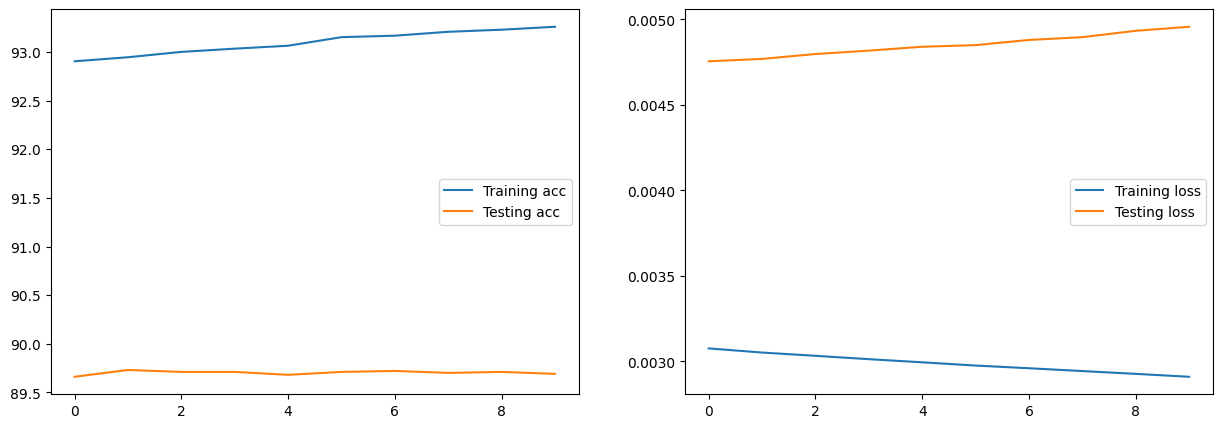

In [21]:
# train 함수를 호출하여 신경망 모델 net을 학습시키는데 학습 데이터 로더 train_loader, 테스트 데이터 로더 test_loader를 사용하고, 총 5 에폭(epoch) 동안 학습을 수행하고 학습 과정에서 계산된 손실과 정확도 같은 통계 정보를 hist 변수에 저장
hist = train(net, train_loader, test_loader, epochs=10)

if hist is None: # train 함수에서 반환된 hist가 None인지 확인하는데 None은 학습 과정에서 오류가 발생했거나 예외가 처리되었음을 의미할 수 있음
    print("Training did not return any history.") # 만약 hist가 None이면, "학습이 어떠한 기록도 반환하지 않았습니다."라는 메시지를 출력하는데 이는 학습 과정에서 문제가 발생했음을 사용자에게 알리는 역할

else: # 만약 hist가 None이 아니라 유효한 데이터가 있으면
    plot_results(hist) # plot_results 함수를 호출하여 hist에 저장된 학습 결과(손실과 정확도 등)를 시각화하는데 이 함수는 일반적으로 matplotlib 같은 라이브러리를 사용하여 그래프를 그리고, 모델의 학습 진행 상황을 보여줌


# plot을 통해 출력된 결과를 확인하면 4회 학습까지 유의미한 결과를 보이다가 5회 학습 이후로 학습 모델에 정확도가 92 ~ 93% 에서 머물렀으며 테스트 정확도는 10회 학습을 진행해도 동일하게 89%로 동일하였다.
# 손실도의 경우에는 학습 모델의 경우에는 점점 하락하였으나 테스트 과정에서는 손실도가 높아졌다.
# 10회 이상의 학습은 무의미하다고 판단되며 오히러 오버피팅의 결과를 초래할 가능성이 있어 보인다.

# 6. 학습을 완료한 모델에 테스트 데이터를 통해 모델을 평가 후 최종 정확도 보고

In [22]:
# Pytorchcv.py에 정의된 validate 함수를 통해 테스트 데이터를 통하여 검증을 진행하고 정확도를 출력 진행함
loss_val, acc_val = validate(net, test_loader) # 학습을 완료한 net 모델에 test_loader 데이터를 통해 예측에 대한 검증을 진행하고 오류 수치와 정확도를 받음
print("최종 모델 성능 결과")
print("="*30)
print(f"Validation Loss: {loss_val:.4f}, Validation Accuracy: {acc_val:.4f}")
print("="*30)

# 최종 성능은 89 ~ 90% 사이로 확인 가능함

최종 모델 성능 결과
Validation Loss: 0.0050, Validation Accuracy: 0.8969


# 7. 잘못된 분류 이미지 분석 및 어떤 클래스가 모델에 의해 가장 잘못 분류되었는지 시각화 자료를 통해 확인 진행

기존의 모델에 학습을 진행하여 모델이 예측을 잘못한 결과를 모아 저장 후 그래프로 그리는 과정을 진행함

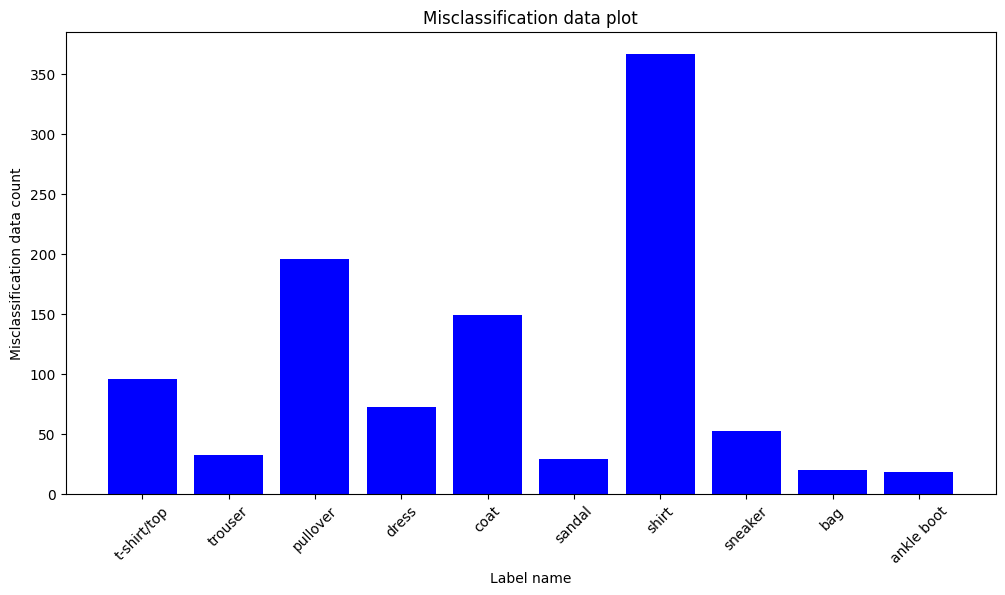

In [43]:
def misclassified_data_plot(net, dataloader, labels_map):
    default_device = "cpu"  # CPU로 설정
    net.eval()  # 평가 모드로 지정
    misclassified_counts = {label: 0 for label in labels_map.values()}  # 처음에 정의한 lables_map에 대한 값에 맞게 0 ~ 9까지 저장 공간 생성

    with torch.no_grad():  # 그라디언트 계산을 하지 않음.
        for features, labels in dataloader:
            features = features.to(default_device)
            labels = labels.to(default_device)

            outputs = net(features)  # 모델에 테스트 데이터를 넣고 값을 예측 받음
            _, predicted = torch.max(outputs, 1)

            # 에측 값이 라벨의 값이랑 다른 값을 찾음.
            misclassified_idx = (predicted != labels).nonzero().squeeze() 

            if misclassified_idx.dim() == 0: # 값이 0차원 인덱스인 경우에는 해당 인덱스만 빼서 저장하도록 처리
                misclassified_idx = [misclassified_idx.item()]

            # 잘못 분류된 이미지의 원래 레이블을 찾아서 +1를 진행하여 count 저장
            for idx in misclassified_idx:
                true_label = labels[idx].item() # 이미지에 해당하는 실제 레이블 즉 어떤 레이블의 이미지를 잘못 예측했는지를 찾음
                misclassified_counts[labels_map[true_label]] += 1 # 해당 이미지의 잘못 예측한 횟수를 +1로 저장

    # 잘못 분류된 카운트를 막대 그래프로 표시합니다.
    labels = list(misclassified_counts.keys()) # 레이블 값
    counts = list(misclassified_counts.values()) # 잘못 분류된 이미지 count 값

    plt.figure(figsize=(12, 6))  # 그래프 크기 설정
    plt.bar(labels, counts, color='blue')  # 막대 그래프 설정
    plt.xlabel('Label name')  # x축 레이블 설정
    plt.ylabel('Misclassification data count')  # y축 제목 설정
    plt.title('Misclassification data plot')  # 그래프 제목 설정
    plt.xticks(rotation=45)  # x축 레이블을 45도 회전
    plt.show()  # 그래프 출력

# misclassified_data_plot 함수를 호출하여  test_loader의 데이터를 기반으로 예측을 진행한 후 잘못 분류된 결과를 그래프로 출력함
misclassified_data_plot(net, test_loader, labels_map)



상단의 test_loader 데이터를 이용한 기존 학습이 완료된 모델을 통한 분류 오류 발생에 대한 plot 결과를 확인하면, shirt, pullover, coat, dress, t-shirt를 순서로 가장 많은 모델에 의한 분류 오류가 발생한 사실을 확인 가능하다.